In [13]:
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


Dimensions

In [15]:
df.rename(columns={'px1 ':'px1'}, inplace=True)

In [16]:
df.shape

(100000, 19)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


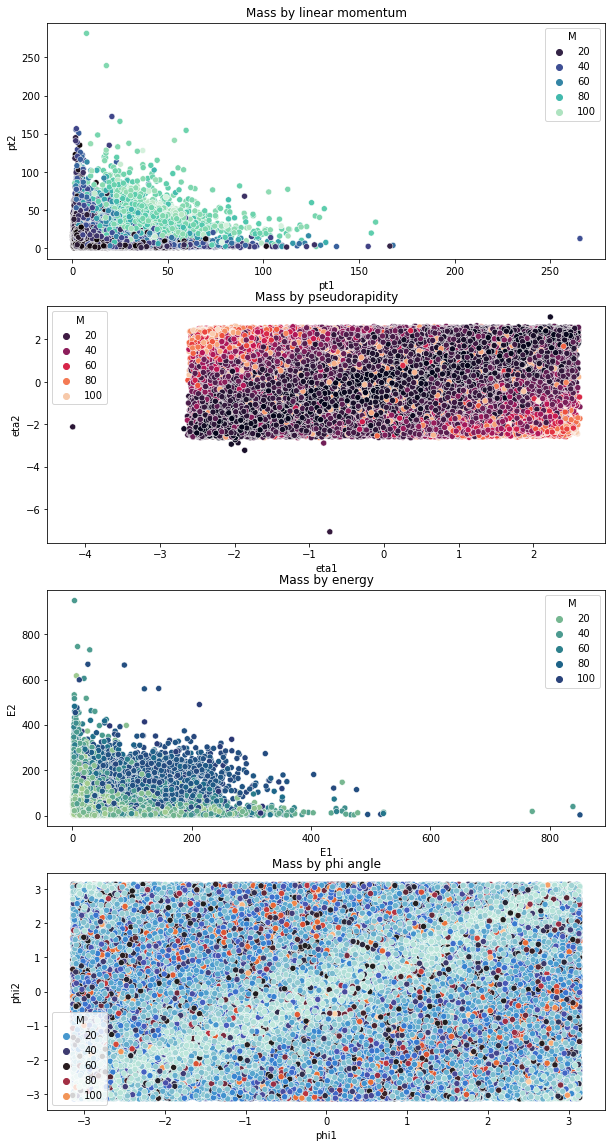

In [18]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(10,20))

sns.scatterplot(ax= ax[0],data=df, x='pt1', y='pt2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='mako')
ax[0].set_title('Mass by linear momentum')
sns.scatterplot(ax= ax[1],data=df, x='eta1', y='eta2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='rocket')
ax[1].set_title('Mass by pseudorapidity')
sns.scatterplot(ax= ax[2],data=df, x='E1', y='E2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='crest')
ax[2].set_title('Mass by energy')
sns.scatterplot(ax= ax[3],data=df, x='phi1', y='phi2', hue='M', hue_norm=(df.M.min(),df.M.max()), palette='icefire')
ax[3].set_title('Mass by phi angle')

plt.show()

In [19]:
df.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99915.000000
mean,147935.327230,4.957212e+08,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,920.306064,4.037703e+08,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023970e+08,8.458595,-5.233675,-5.276248,-15.859825,3.771172,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738103,-1.892287,-1.556925,-1.000000,12.445200
50%,147929.000000,3.902759e+08,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061178,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.283100
75%,149011.000000,6.338891e+08,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


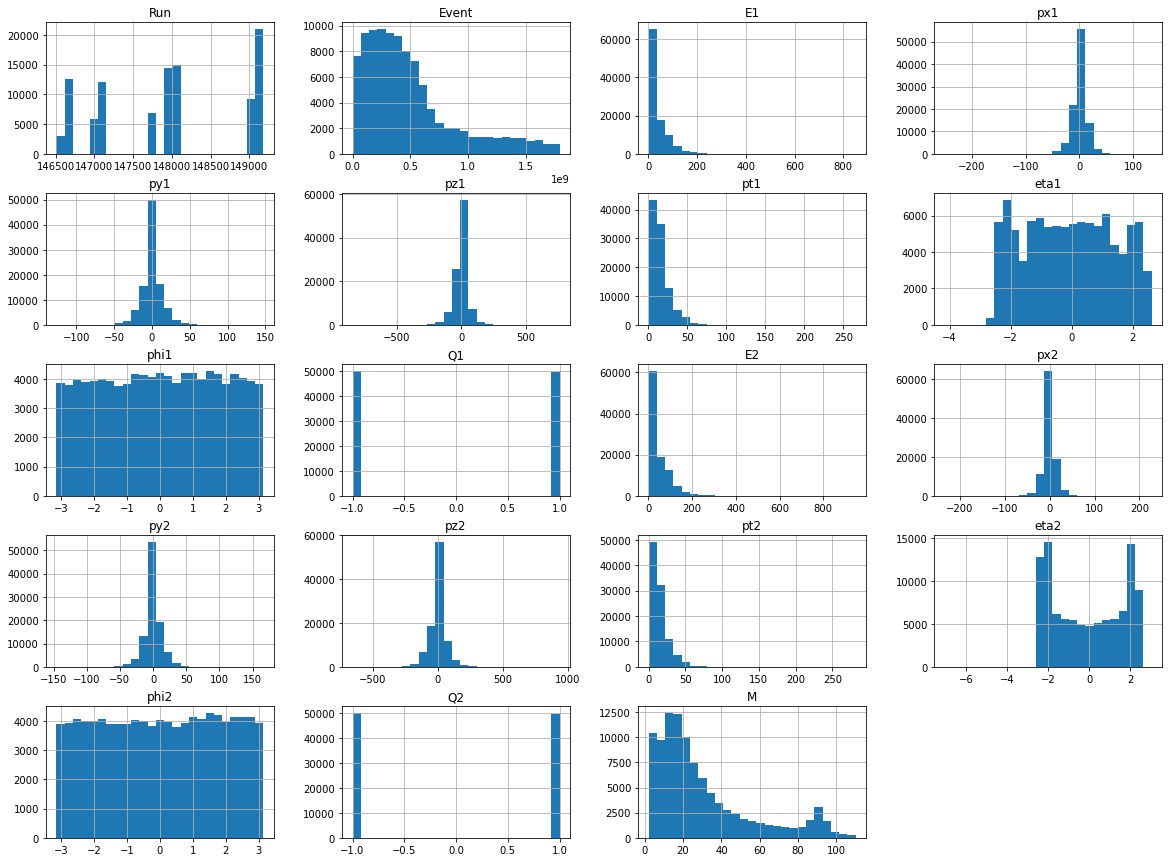

In [20]:
df.hist(bins=25, figsize=(20, 15))
plt.show()

## Duplicates Removal

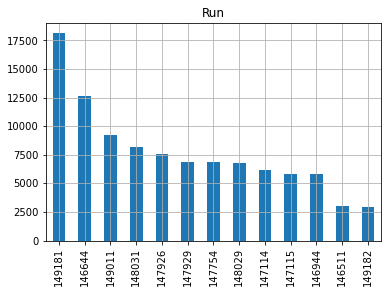

In [21]:
df.Run.value_counts().plot(kind='bar')
plt.grid()
plt.title('Run')
plt.show()

In [22]:
multis = df.Event.value_counts() 
multis = multis[multis.values>1] 
multis

439950319    3
440012942    3
542369397    2
541746848    2
407103633    2
407076179    2
406690266    2
338078762    2
337851094    2
337653458    2
337473110    2
518989177    2
541698960    2
519135297    2
541649129    2
418006834    2
542510767    2
542302783    2
541673578    2
541668133    2
541754934    2
541661621    2
Name: Event, dtype: int64

In [23]:
multis_ids = multis.index.to_list()
print(multis_ids)

df[df.Event.isin(multis_ids)].sort_values('Event')

[439950319, 440012942, 542369397, 541746848, 407103633, 407076179, 406690266, 338078762, 337851094, 337653458, 337473110, 518989177, 541698960, 519135297, 541649129, 418006834, 542510767, 542302783, 541673578, 541668133, 541754934, 541661621]


,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
97032,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
96984,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
97033,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96985,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96986,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97034,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97035,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
96987,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
97015,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660
96988,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660


Event 418006834 seems to have different values for its duplicates, Lets make a new event and add the one of its data to it. 

In [24]:
df[df.Event==418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
39064,147114,418006834,18.7789,5.74359,7.40263,-16.27450,9.36951,-1.319410,0.910934,1,61.61360,23.14570,5.76582,-56.80910,23.8530,-1.602350,0.244141,1,10.66540
79612,148029,418006834,21.8398,-19.43140,-9.03848,-4.20742,21.43070,-0.195087,-2.706210,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.842080,1,3.76546


In [25]:
df.loc[39064,'Event'] = 418006833 # use a number that is not yet in use!
# and adjust our duplicate list
multis_ids.remove(418006834)
# check:
df[df.Event==418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
79612,148029,418006834,21.8398,-19.4314,-9.03848,-4.20742,21.4307,-0.195087,-2.70621,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.84208,1,3.76546


In [26]:
df = df.drop_duplicates(subset='Event')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99977 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99977 non-null  int64  
 1   Event   99977 non-null  int64  
 2   E1      99977 non-null  float64
 3   px1     99977 non-null  float64
 4   py1     99977 non-null  float64
 5   pz1     99977 non-null  float64
 6   pt1     99977 non-null  float64
 7   eta1    99977 non-null  float64
 8   phi1    99977 non-null  float64
 9   Q1      99977 non-null  int64  
 10  E2      99977 non-null  float64
 11  px2     99977 non-null  float64
 12  py2     99977 non-null  float64
 13  pz2     99977 non-null  float64
 14  pt2     99977 non-null  float64
 15  eta2    99977 non-null  float64
 16  phi2    99977 non-null  float64
 17  Q2      99977 non-null  int64  
 18  M       99892 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 15.3 MB


Missing Data

In [28]:
print(df.isnull().sum())

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64


In [29]:
print(df.isnull().all())

Run      False
Event    False
E1       False
px1      False
py1      False
pz1      False
pt1      False
eta1     False
phi1     False
Q1       False
E2       False
px2      False
py2      False
pz2      False
pt2      False
eta2     False
phi2     False
Q2       False
M        False
dtype: bool


In [30]:
import missingno as msno

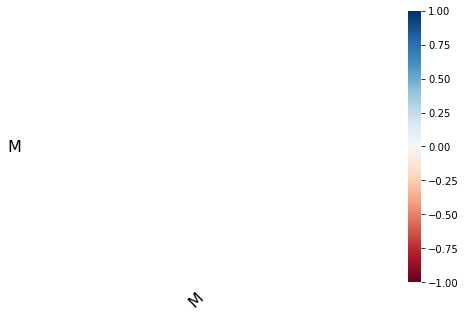

In [31]:
msno.heatmap(df,figsize=(8,5))
plt.show()

As its just Mass thats missing data we can use median

In [32]:
df["M"].fillna(df["M"].median(),inplace=True)
print(df.isnull().sum()) 

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64


#### Correlation - Run and Event isnt needed here and therefore Dropped

In [33]:
datcorr = df.drop(["Run","Event"],axis=1)

In [34]:
corrPe= datcorr.corr(method="pearson")

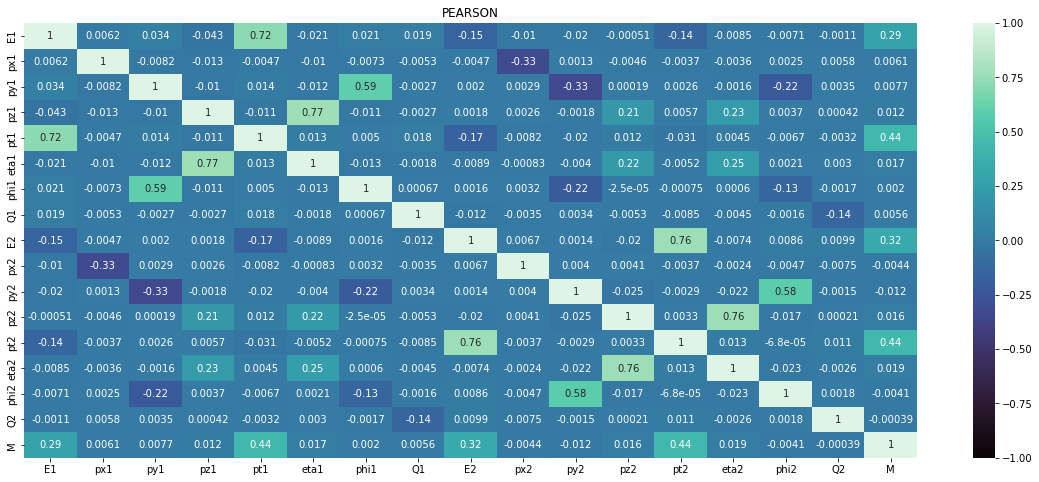

In [35]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(corrPe,annot=True,vmin=-1,center=0,vmax=1, cmap='mako')
plt.title("PEARSON")
plt.show()

Mass Invarient (M) has great correlation between Energies [E1, E2] and Linear Momentums [pt1, pt2]

In [36]:
features_num = ['E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 
                'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2']

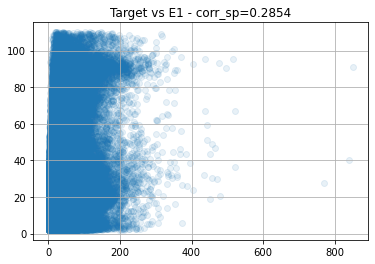

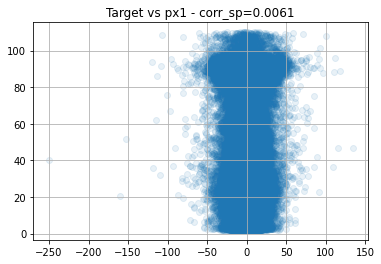

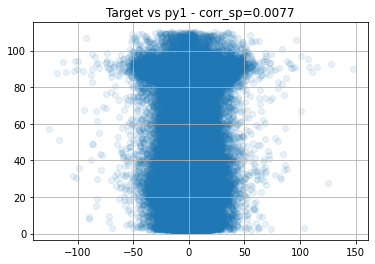

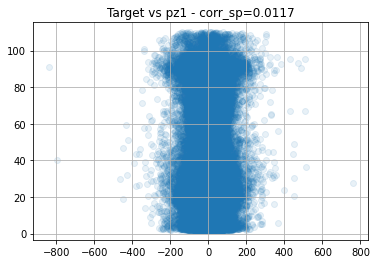

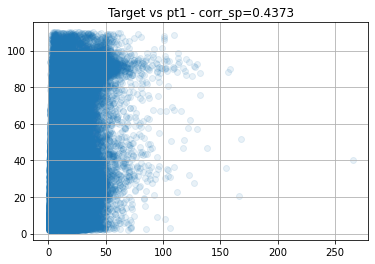

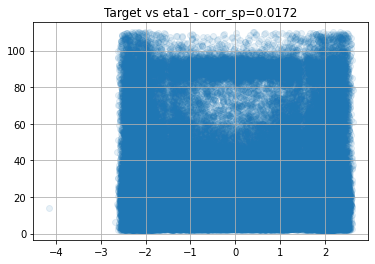

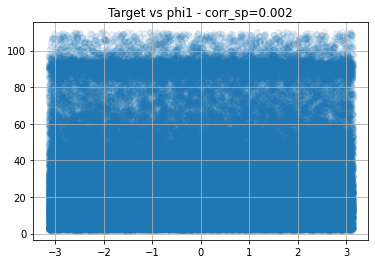

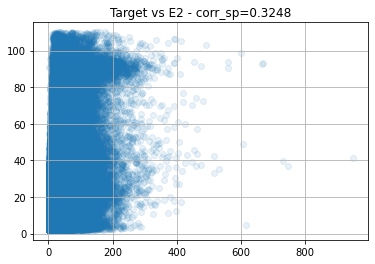

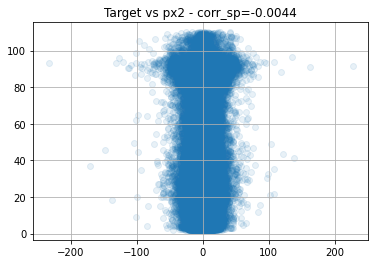

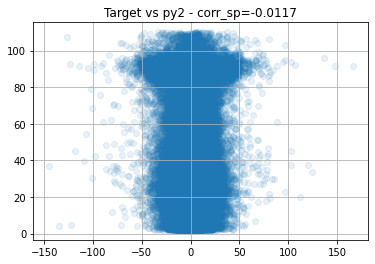

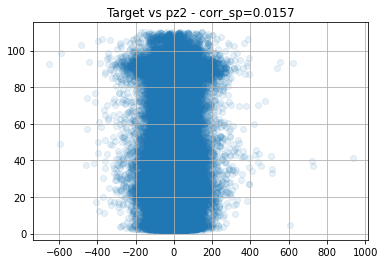

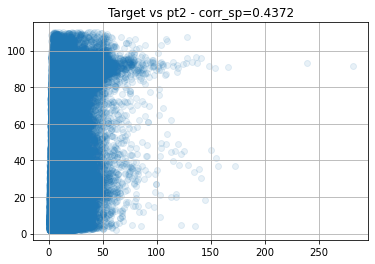

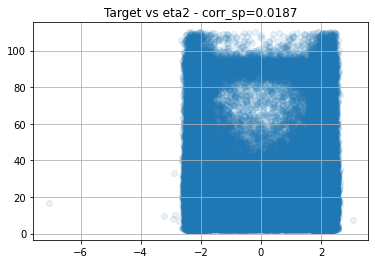

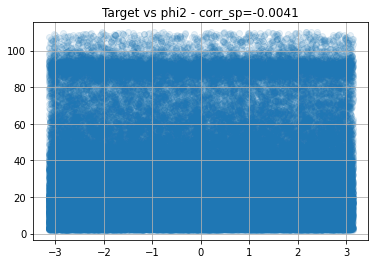

In [37]:
for f in features_num:
    c = np.round(df[f].corr(df.M, method='pearson'),4) # correlation
    plt.scatter(df[f], df.M, alpha=0.1)
    plt.title('Target vs '+f+' - corr_sp='+str(c))
    plt.grid()
    plt.show()

Not much correlation between M and the features except for Energy and Linear Momentum 

Let try Mean or Product of a features of the 2 particles (+ and -) and see if the correlation changes

Lets take pseudorapidity of the electron 1 and 2, eta1 and eta2 

In [38]:
df2 = df.copy()

In [41]:
df2['eta12'] = df.eta1 * df.eta2

Two Tailed p-value Test to see if eta12's correlation is significant or not, Our confidence level is 0.05.

In [42]:
from scipy.stats.stats import pearsonr
#calculation correlation coefficient and p-value between x and y
pearsonr(df2['eta12'], df2['M'])

D:\Temp\ipykernel_4128\4256373212.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


(-0.49136186571284335, 0.0)

As p-value < 0.05, we can reject the null hypothesis (uncorrelated) and proceed to find the correlation

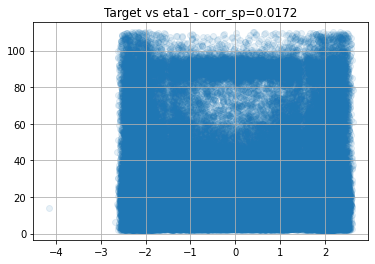

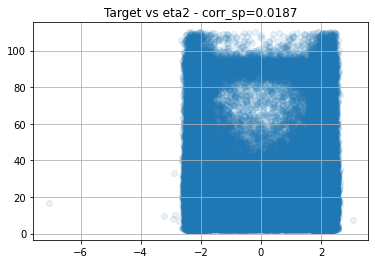

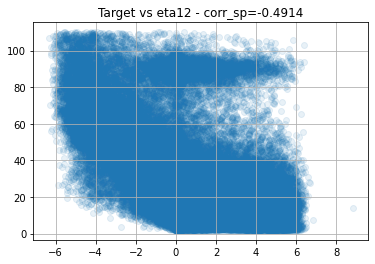

In [43]:
df2['eta12'] = df.eta1 * df.eta2
# calc correlation with target and visualize
for f in ['eta1','eta2','eta12']:
    c = np.round(df2[f].corr(df2.M, method='pearson'),4) # correlation
    plt.scatter(df2[f], df2.M, alpha=0.1)
    plt.title('Target vs '+f+' - corr_sp='+str(c))
    plt.grid()
    plt.show()

Seems like Product of the features increase the Correlation! Lets try on the other similar features

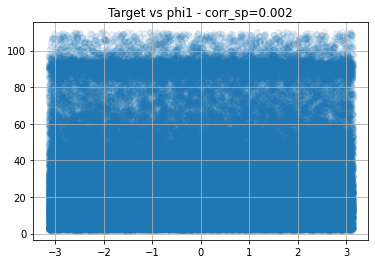

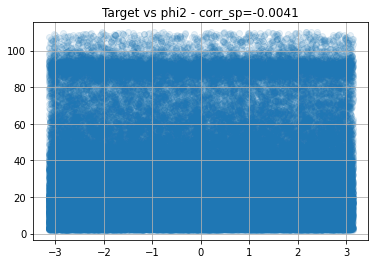

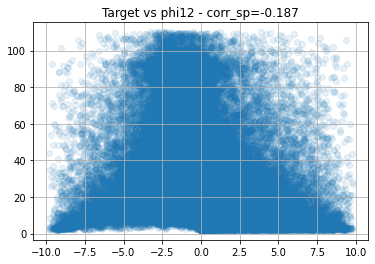

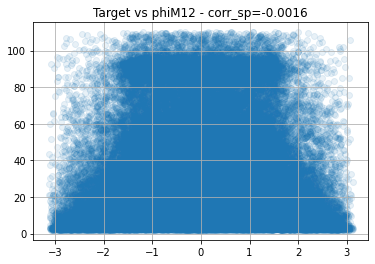

In [44]:
df2['phi12'] = df.phi1 * df.phi2
df2['phiM12'] = (df.phi1 + df.phi2)/2
# calc correlation with target and visualize
for f in ['phi1','phi2','phi12', 'phiM12']:
    c = np.round(df2[f].corr(df2.M, method='pearson'),4) # correlation
    plt.scatter(df2[f], df2.M, alpha=0.1)
    plt.title('Target vs '+f+' - corr_sp='+str(c))
    plt.grid()
    plt.show()

Hmm seems like Mean doesnt do much, So lets drop it and focus on product

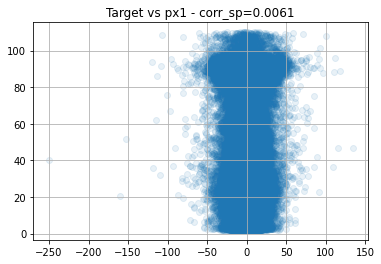

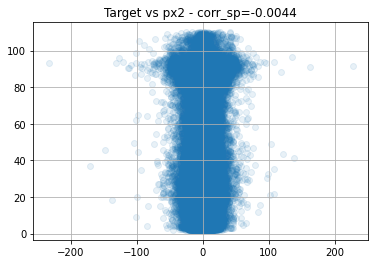

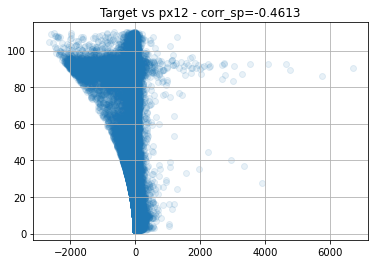

In [45]:
df2['px12'] = df.px1 * df.px2
# calc correlation with target and visualize
for f in ['px1','px2','px12']:
    c = np.round(df2[f].corr(df2.M, method='pearson'),4) # correlation
    plt.scatter(df2[f], df2.M, alpha=0.1)
    plt.title('Target vs '+f+' - corr_sp='+str(c))
    plt.grid()
    plt.show()

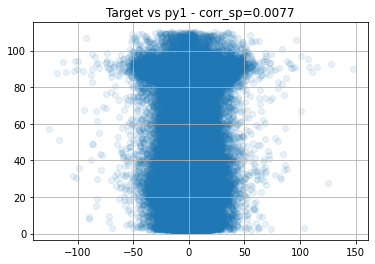

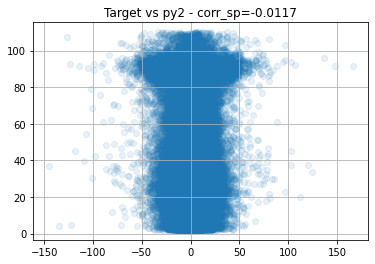

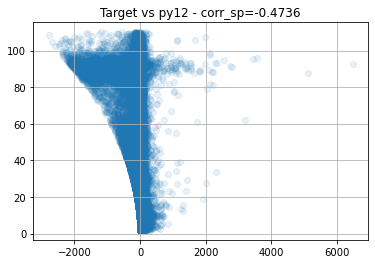

In [46]:
df2['py12'] = df.py1 * df.py2
# calc correlation with target and visualize
for f in ['py1','py2','py12']:
    c = np.round(df2[f].corr(df2.M, method='pearson'),4) # correlation
    plt.scatter(df2[f], df2.M, alpha=0.1)
    plt.title('Target vs '+f+' - corr_sp='+str(c))
    plt.grid()
    plt.show()

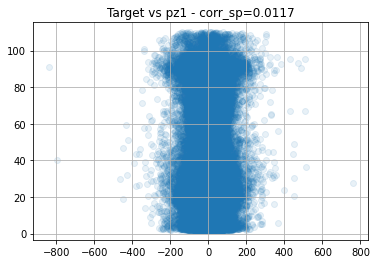

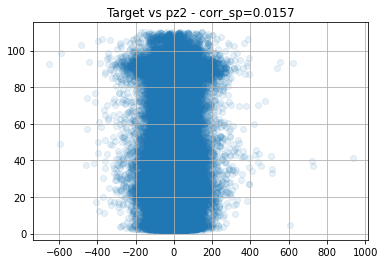

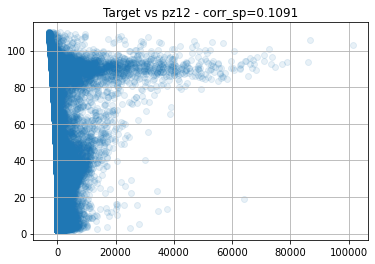

In [47]:
df2['pz12'] = df.pz1 * df.pz2
# calc correlation with target and visualize
for f in ['pz1','pz2','pz12']:
    c = np.round(df2[f].corr(df2.M, method='pearson'),4) # correlation
    plt.scatter(df2[f], df2.M, alpha=0.1)
    plt.title('Target vs '+f+' - corr_sp='+str(c))
    plt.grid()
    plt.show()

In [48]:
df2 = df2.drop(["Run","Event", 'phiM12'],axis=1)

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99977 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      99977 non-null  float64
 1   px1     99977 non-null  float64
 2   py1     99977 non-null  float64
 3   pz1     99977 non-null  float64
 4   pt1     99977 non-null  float64
 5   eta1    99977 non-null  float64
 6   phi1    99977 non-null  float64
 7   Q1      99977 non-null  int64  
 8   E2      99977 non-null  float64
 9   px2     99977 non-null  float64
 10  py2     99977 non-null  float64
 11  pz2     99977 non-null  float64
 12  pt2     99977 non-null  float64
 13  eta2    99977 non-null  float64
 14  phi2    99977 non-null  float64
 15  Q2      99977 non-null  int64  
 16  M       99977 non-null  float64
 17  eta12   99977 non-null  float64
 18  phi12   99977 non-null  float64
 19  px12    99977 non-null  float64
 20  py12    99977 non-null  float64
 21  pz12    99977 non-null  float64
dty

Energies and Linear Momentum have high Correlation but lets see if it increases with their products

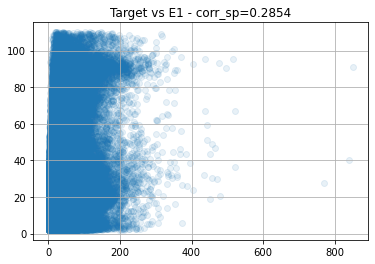

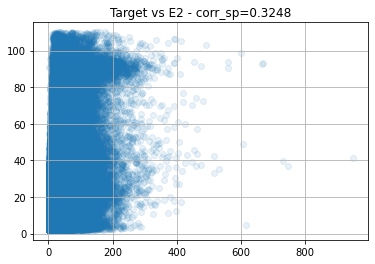

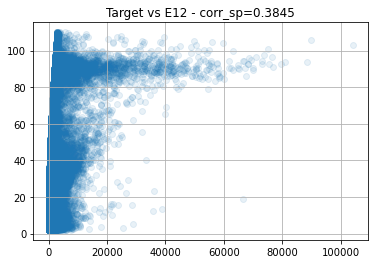

In [50]:
df2['E12'] = df.E1 * df.E2
# calc correlation with target and visualize
for f in ['E1','E2','E12']:
    c = np.round(df2[f].corr(df2.M, method='pearson'),4) # correlation
    plt.scatter(df2[f], df2.M, alpha=0.1)
    plt.title('Target vs '+f+' - corr_sp='+str(c))
    plt.grid()
    plt.show()

There is an increase not as much as the previous features but we could still use this.....

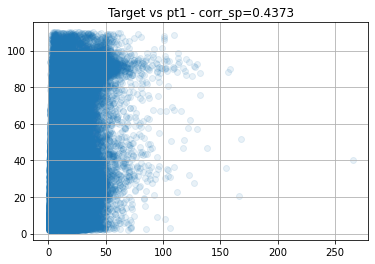

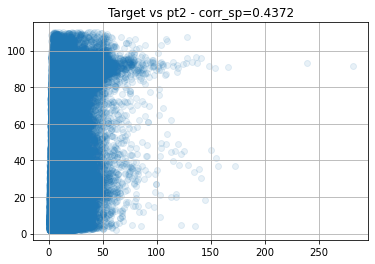

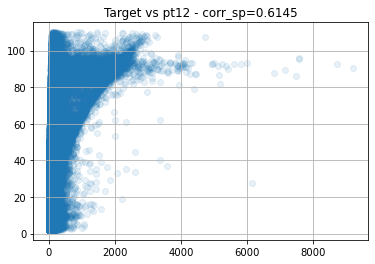

In [51]:
df2['pt12'] = df.pt1 * df.pt2
# calc correlation with target and visualize
for f in ['pt1','pt2','pt12']:
    c = np.round(df2[f].corr(df2.M, method='pearson'),4) # correlation
    plt.scatter(df2[f], df2.M, alpha=0.1)
    plt.title('Target vs '+f+' - corr_sp='+str(c))
    plt.grid()
    plt.show()

Thats a pretty big increase!

In [52]:
df3 = df.copy()

In [53]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OGradientBoostingEstimator

In [56]:
predictors = features_num
print('Number of predictors: ', len(predictors))
print(predictors)

# define target
target='M'

Number of predictors:  14
['E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2']


In [57]:
h2o.init(max_mem_size='3G', nthreads=4)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,30 mins 15 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,1 month and 4 days
H2O_cluster_name:,H2O_from_python_Deepesh_lgm75d
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.454 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [58]:
df_hex = h2o.H2OFrame(df2)

# train / test split (80/20)
train_perc = 0.8
train_hex, test_hex = df_hex.split_frame(ratios=[train_perc], seed=999)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [59]:
df_train = train_hex.as_data_frame()
df_test = test_hex.as_data_frame()

df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')

In [60]:
GBE = H2OGradientBoostingEstimator(ntrees = 500,
                                     max_depth=4,
                                     min_rows=15,
                                     sample_rate=0.9,
                                     col_sample_rate=0.7,
                                     nfolds=5,
                                     seed=999)

#### Without Feature Engineering

In [61]:
time1 = time.time()
GBE.train(x=predictors,
            y=target,
            training_frame=train_hex)
time2 = time.time()
print('Elapsed time [s]: ', np.round(time2-time1,2))

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  55.43


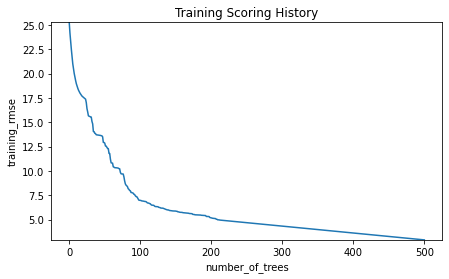

In [62]:
plt.rcParams['figure.figsize']=(7,4)
GBE.plot()

In [63]:
GBE.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.328370,0.063927,2.229608,2.358079,2.343555,2.400186,2.310421
1,mean_residual_deviance,10.860769,0.665152,9.988221,10.995067,11.134054,11.728686,10.457819
2,mse,10.860769,0.665152,9.988221,10.995067,11.134054,11.728686,10.457819
3,r2,0.982975,0.000934,0.984077,0.982948,0.982852,0.981548,0.983450
4,residual_deviance,10.860769,0.665152,9.988221,10.995067,11.134054,11.728686,10.457819
5,rmse,3.294328,0.101066,3.160415,3.315881,3.336773,3.424717,3.233855
6,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


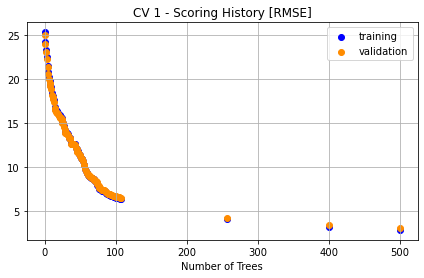

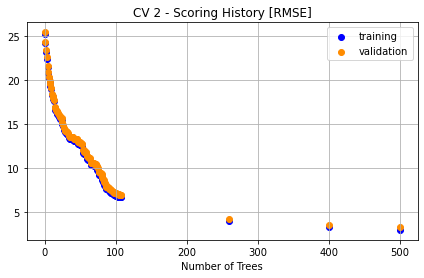

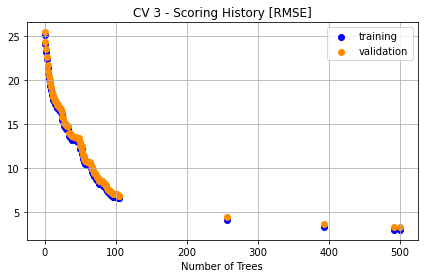

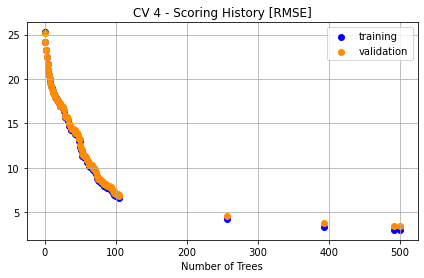

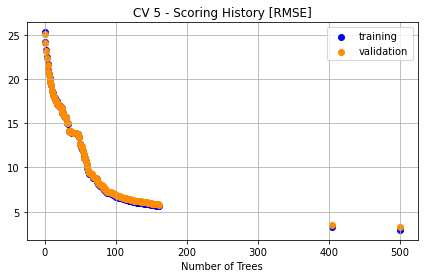

In [64]:
for i in range(5):
    cv_model_temp = GBE.cross_validation_models()[i]
    df_cv_score_history = cv_model_temp.score_history()
    my_title = 'CV ' + str(1+i) + ' - Scoring History [RMSE]'
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.training_rmse, 
                c='blue', label='training')
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.validation_rmse, 
                c='darkorange', label='validation')
    plt.title(my_title)
    plt.xlabel('Number of Trees')
    plt.legend()
    plt.grid()
    plt.show()

Elapsed time [s]:  13.84


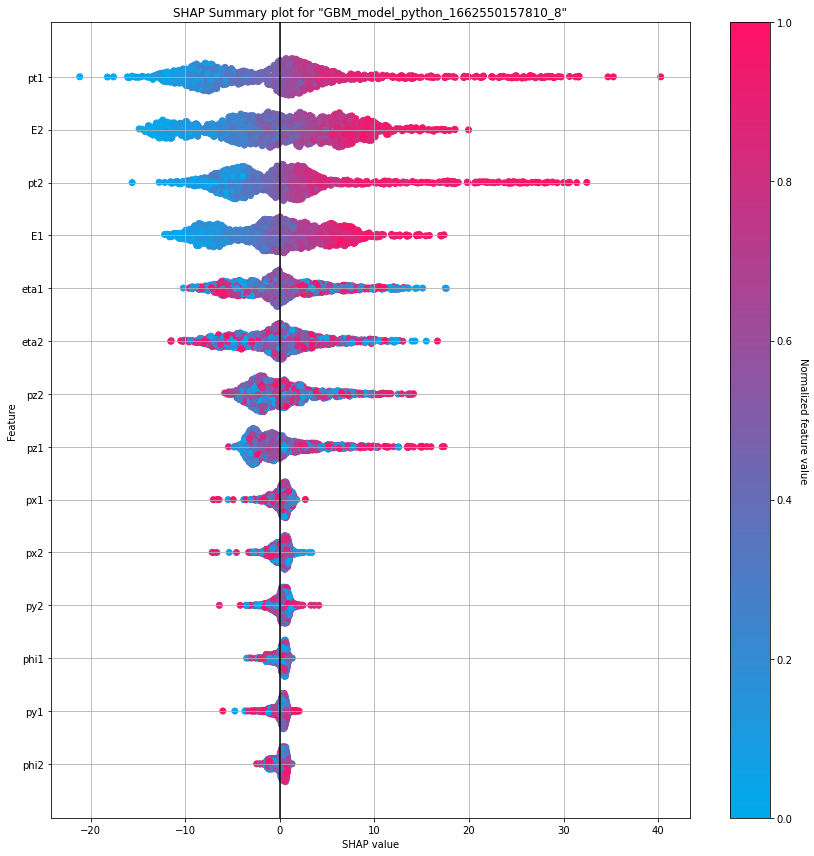

In [65]:
t1 = time.time()
GBE.shap_summary_plot(train_hex);
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

### Prediction on Test

In [66]:
pred_test = GBE.predict(test_hex)
y_test_act = test_hex.as_data_frame()[target].values # actual values
y_test_pred = pred_test.as_data_frame().predict.values # predictions

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [67]:
data = { 'Actual': y_test_act, 'Prediction': y_test_pred}
data = pd.DataFrame(data=data)

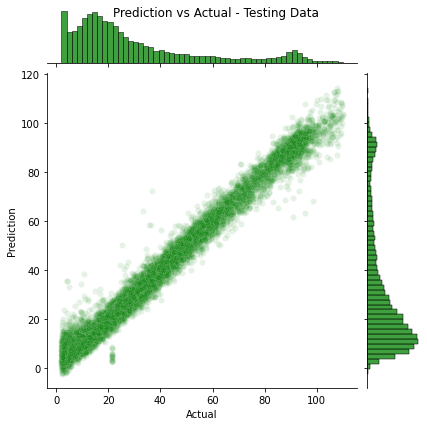

In [68]:
p=sns.jointplot(data=data, x = 'Actual', y='Prediction',
              joint_kws={'alpha' : 0.1}, color="Green")
p.fig.suptitle('Prediction vs Actual - Testing Data')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [69]:
print('Correlations - Test Set')
print('Correlation Pearson:', stats.pearsonr(y_test_act, y_test_pred))
print('Correlation Spearman:', stats.spearmanr(y_test_act, y_test_pred))

Correlations - Test Set
Correlation Pearson: (0.9919351924802422, 0.0)
Correlation Spearman: SpearmanrResult(correlation=0.9799535100425967, pvalue=0.0)


In [70]:
print('MAE (test): ', np.round(mean_absolute_error(y_test_act, y_test_pred),2))
print('RMSE(test): ', np.round(np.sqrt(mean_squared_error(y_test_act, y_test_pred)),2))

MAE (test):  2.28
RMSE(test):  3.2


## Now lets see on the feature engineered set

In [72]:
predictors = ['px12', 'py12', 'pz12', 'pt12', 'phi12', 'eta12', 'E12']
print('Number of predictors: ', len(predictors))
print(predictors)

Number of predictors:  7
['px12', 'py12', 'pz12', 'pt12', 'phi12', 'eta12', 'E12']


In [76]:
GBE2 = H2OGradientBoostingEstimator(ntrees = 500,
                                     max_depth=4,
                                     min_rows=15,
                                     sample_rate=0.9,
                                     col_sample_rate=0.7,
                                     nfolds=5,
                                     seed=999)

In [77]:
time1 = time.time()
GBE2.train(x=predictors,
            y=target,
            training_frame=train_hex)
time2 = time.time()
print('Elapsed time [s]: ', np.round(time2-time1,2))

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  40.08


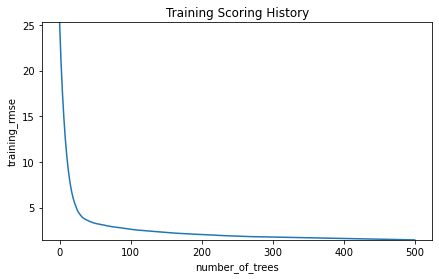

In [78]:
plt.rcParams['figure.figsize']=(7,4)
GBE2.plot()

In [79]:
GBE2.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.015716,0.007750,1.012631,1.025638,1.016834,1.018790,1.004689
1,mean_residual_deviance,2.825197,0.121869,2.644188,2.771170,2.927804,2.844359,2.938463
2,mse,2.825197,0.121869,2.644188,2.771170,2.927804,2.844359,2.938463
3,r2,0.995571,0.000173,0.995785,0.995702,0.995491,0.995525,0.995350
4,residual_deviance,2.825197,0.121869,2.644188,2.771170,2.927804,2.844359,2.938463
5,rmse,1.680516,0.036459,1.626096,1.664683,1.711083,1.686523,1.714195
6,rmsle,0.136422,0.003677,0.137710,0.140408,0.135921,NaN,0.131650


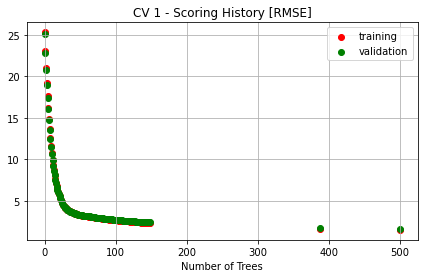

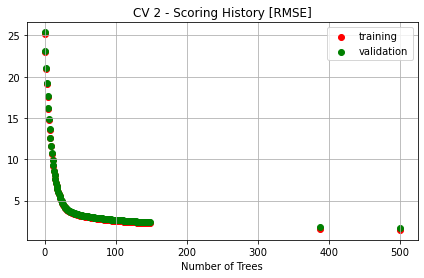

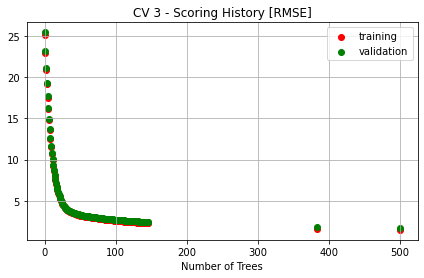

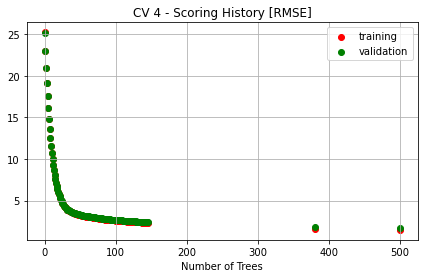

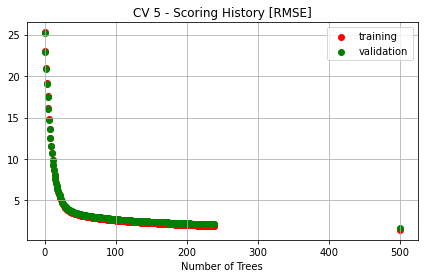

In [80]:
for i in range(5):
    cv_model_temp = GBE2.cross_validation_models()[i]
    df_cv_score_history = cv_model_temp.score_history()
    my_title = 'CV ' + str(1+i) + ' - Scoring History [RMSE]'
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.training_rmse, 
                c='red', label='training')
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.validation_rmse, 
                c='green', label='validation')
    plt.title(my_title)
    plt.xlabel('Number of Trees')
    plt.legend()
    plt.grid()
    plt.show()

Elapsed time [s]:  13.6


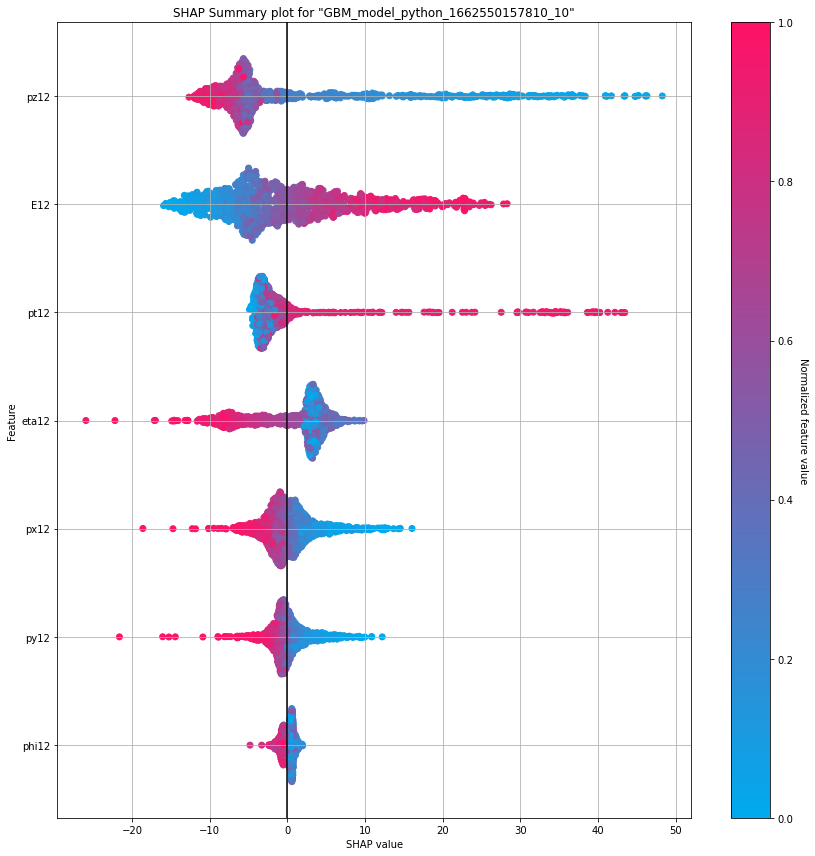

In [81]:
t1 = time.time()
GBE2.shap_summary_plot(train_hex);
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

In [82]:
pred_test = GBE2.predict(test_hex)
y_test_act = test_hex.as_data_frame()[target].values # actual values
y_test_pred = pred_test.as_data_frame().predict.values # predictions

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [83]:
data = { 'Actual': y_test_act, 'Prediction': y_test_pred}
data = pd.DataFrame(data=data)

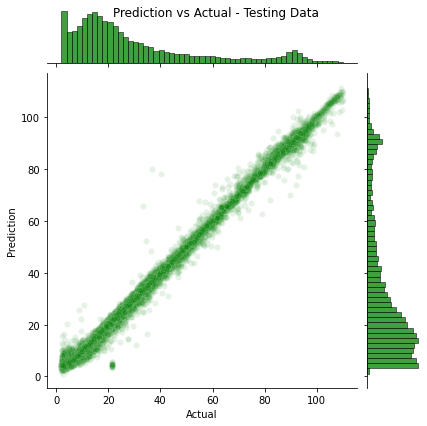

In [84]:
p=sns.jointplot(data=data, x = 'Actual', y='Prediction',
              joint_kws={'alpha' : 0.1}, color="Green")
p.fig.suptitle('Prediction vs Actual - Testing Data')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

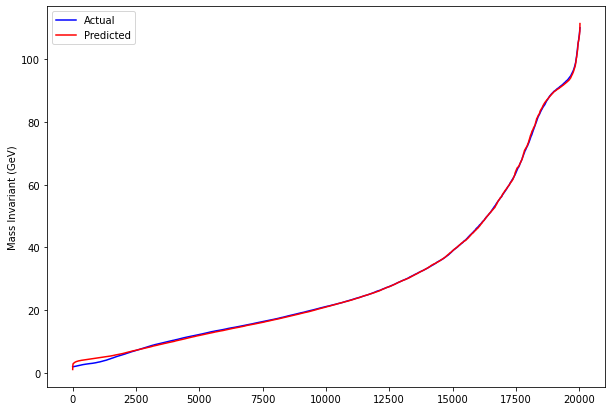

In [85]:
fig = plt.figure(figsize=(10,7))

plt.plot(np.arange(0,len(y_test_act)),sorted(y_test_act), c='b', label='Actual')
plt.plot(np.arange(0,len(y_test_pred)),sorted(y_test_pred), c='r', label='Predicted')

plt.ylabel('Mass Invariant (GeV)')
plt.legend(loc='best')

In [86]:
print('Correlations - Test Set')
print('Correlation Pearson:', stats.pearsonr(y_test_act, y_test_pred))
print('Correlation Spearman:', stats.spearmanr(y_test_act, y_test_pred))

Correlations - Test Set
Correlation Pearson: (0.9976890859302876, 0.0)
Correlation Spearman: SpearmanrResult(correlation=0.9941367075945247, pvalue=0.0)


In [87]:
print('MAE (test): ', np.round(mean_absolute_error(y_test_act, y_test_pred),2))
print('RMSE(test): ', np.round(np.sqrt(mean_squared_error(y_test_act, y_test_pred)),2))

MAE (test):  1.02
RMSE(test):  1.71
